In [130]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

In [125]:
results = {
    'b-resnet' : pd.read_json('../nuc_2_jetson_b-resnet.jsonanalysis.json'),
    'b-densenet' : pd.read_json('../nuc_2_jetson_b-densenet.jsonanalysis.json')
}

methods = ['latest', 'confidence (add)', 'confidence (add,weighted)', 'confidence (max)', 
           'score_margin (add)' , 'score-margin (add,weighted)', 'score-margin (max)']

results['b-densenet']

,Delay Threshold,N,Exit,confidence (add),"confidence (add,weighted)",confidence (max),latest,missed,"score-margin (add,weighted)",score-margin (max),score_margin (add)
0,50,5000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,5000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,5000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65,5000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70,5000,"[0.0, 0.0, 1.0, 0.0]",1.000000,1.000000,1.000000,1.000000,4999.0,1.000000,1.000000,1.000000
5,75,5000,"[15.0, 17.0, 395.0, 0.0]",0.826698,0.852459,0.843091,0.847775,4573.0,0.843091,0.824356,0.833724
6,80,5000,"[33.0, 32.0, 2535.0, 0.0]",0.818462,0.831923,0.826154,0.830000,2400.0,0.826538,0.801538,0.818846
7,85,5000,"[15.0, 11.0, 4167.0, 0.0]",0.818269,0.831624,0.827570,0.829716,807.0,0.827570,0.799666,0.818269
8,90,5000,"[4.0, 7.0, 4284.0, 420.0]",0.823754,0.834995,0.832662,0.833722,285.0,0.831177,0.801909,0.823754
9,95,5000,"[5.0, 0.0, 1967.0, 2880.0]",0.840890,0.849959,0.847898,0.850783,148.0,0.845425,0.808945,0.840890


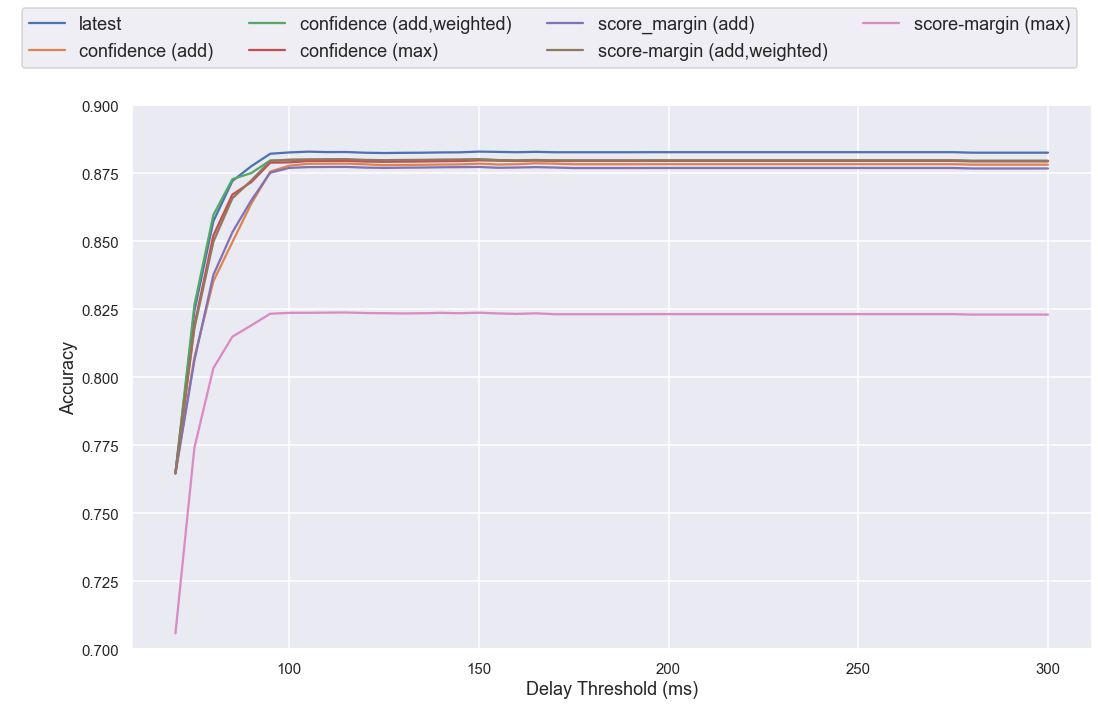

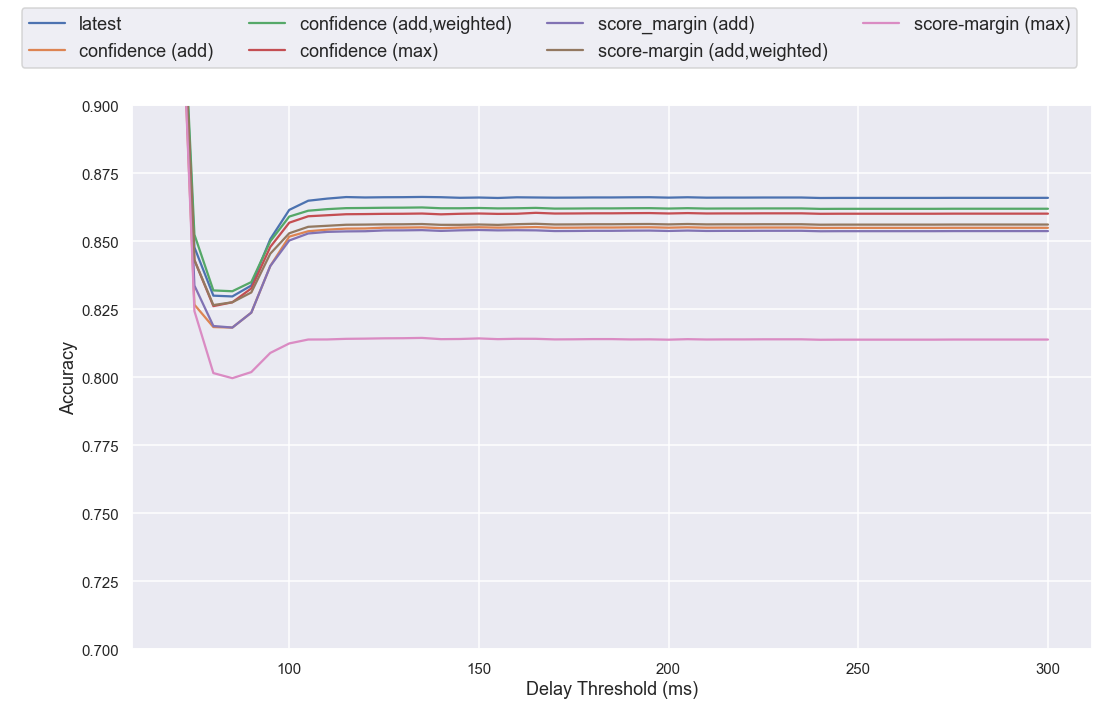

In [126]:
for net in results:
    fig, axes = plt.subplots(1,1, figsize=(16,10))
    for method in methods:
        axes.plot(results[net]['Delay Threshold'], results[net][method])
    axes.set_ylim([0.70,0.90])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Accuracy')
    fig.legend(methods, ncol=4, 
               loc="upper center", fontsize='medium')
    fig.tight_layout()
    fig.subplots_adjust(top=0.85, left=0.15)
    plt.savefig(net + '_information-combination.png')

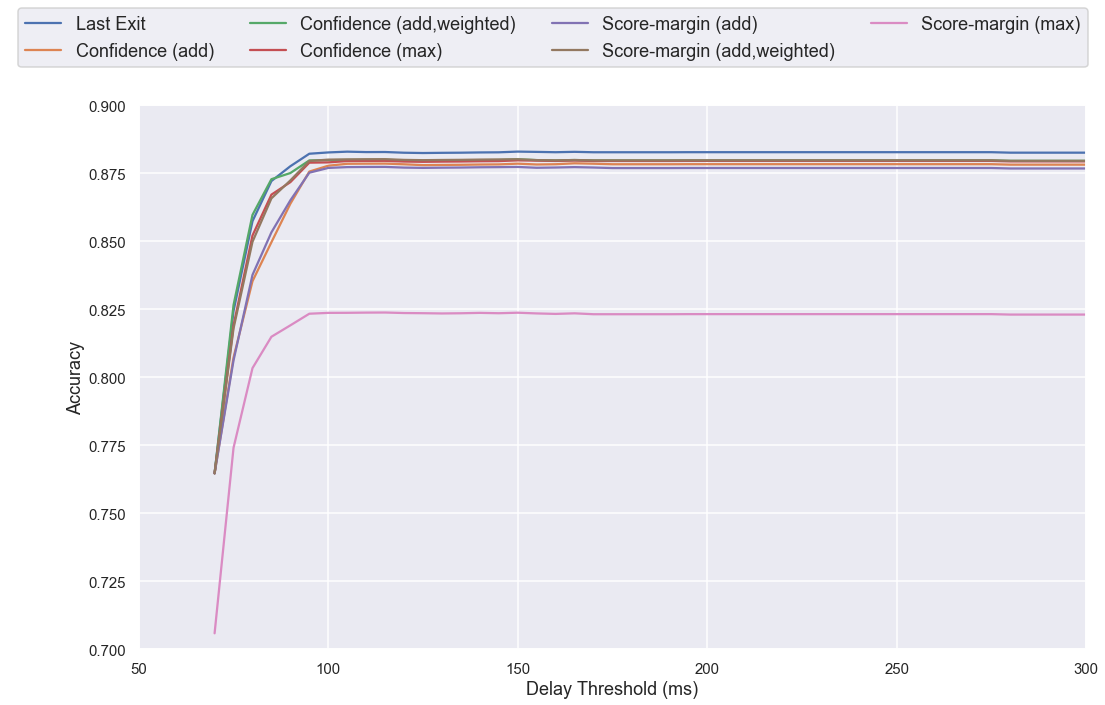

In [127]:
fig, axes = plt.subplots(1,1, figsize=(16,10))
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['latest'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['confidence (add)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['confidence (add,weighted)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['confidence (max)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['score_margin (add)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['score-margin (add,weighted)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['score-margin (max)'])
axes.set_xlim([50,300])
axes.set_ylim([0.70,0.90])
axes.set(xlabel='Delay Threshold (ms)', ylabel='Accuracy')
fig.legend(['Last Exit', 'Confidence (add)', 'Confidence (add,weighted)', 'Confidence (max)',
           'Score-margin (add)', 'Score-margin (add,weighted)', 'Score-margin (max)'], ncol=4, 
           loc="upper center", fontsize='medium')
fig.tight_layout()
fig.subplots_adjust(top=0.85, left=0.15)
plt.savefig('information-combination.png')

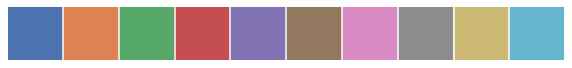

In [52]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

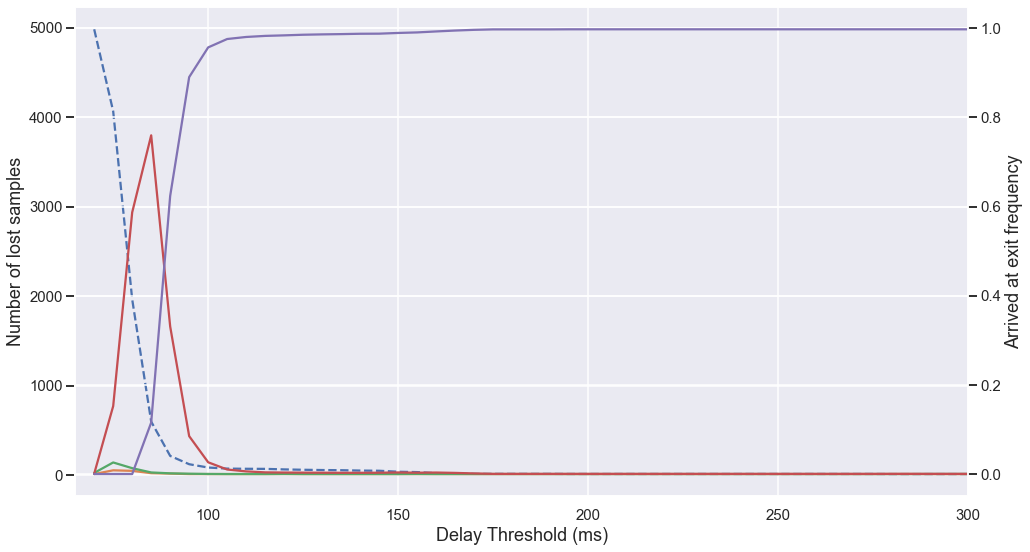

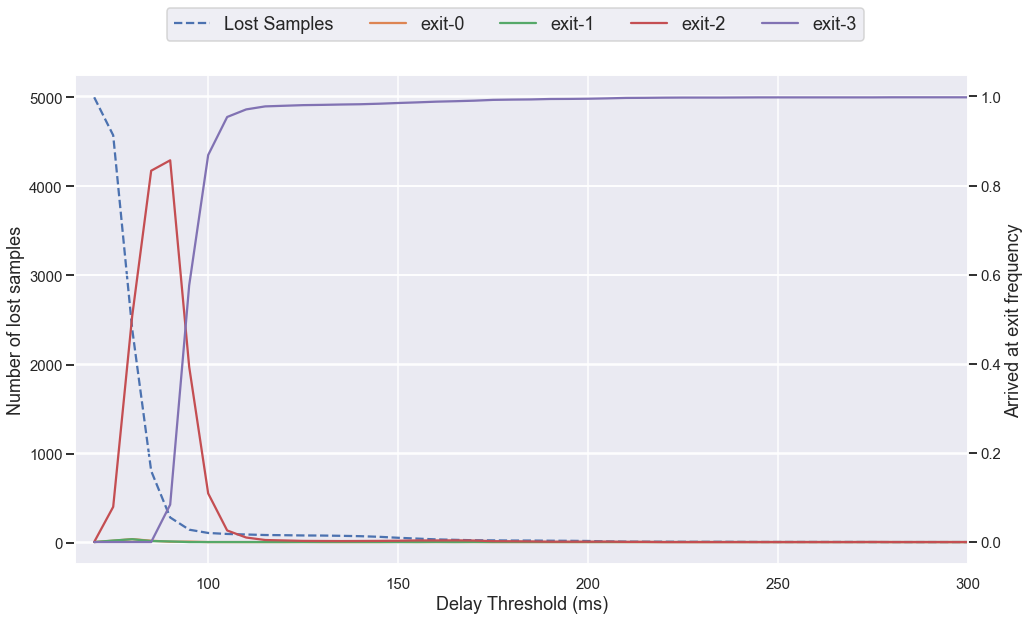

In [135]:
for net in results:
    fig, axes = plt.subplots(1,1)
    #print(results[net]['missed'])
    ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
    axes.plot(results[net]['Delay Threshold'], results[net]['missed'], '--')
    axes.set_xlim([65,300])
    #axes.set_ylim([-0.05,1.05])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Number of lost samples')

    
    results[net] = results[net].dropna()
    exits = np.array(results[net]['Exit'].tolist())
    ax2.plot(results[net]['Delay Threshold'], exits[:,0]/5000,  color=current_palette[1])
    ax2.plot(results[net]['Delay Threshold'], exits[:,1]/5000,  color=current_palette[2])
    ax2.plot(results[net]['Delay Threshold'], exits[:,2]/5000,  color=current_palette[3])
    ax2.plot(results[net]['Delay Threshold'], exits[:,3]/5000,  color=current_palette[4])


    ax2.set(ylabel='Arrived at exit frequency')


fig.legend(['Lost Samples'] + ['exit-{}'.format(x) for x in range(4)], ncol=5, loc="upper center", fontsize='medium')
plt.savefig(net + '_exit-reached.png')

In [107]:
lp = {
    'b-resnet' : pd.read_json('../nuc_2_jetson_b-resnet_lost_prediction_analysis.json'),
    'b-densenet' : pd.read_json('../nuc_2_jetson_b-densenet_lost_prediction_analysis.json')
}

In [108]:
lp['b-resnet']

,N Exits,confidence (add),"confidence (add,weighted)",confidence (max),latest,"score-margin (add,weighted)",score-margin (max),score_margin (add)
0,5000,0.4394,0.4394,0.4394,0.4394,0.4394,0.4394,0.4394
1,5000,0.6412,0.6594,0.6496,0.6684,0.6488,0.6374,0.6374
2,5000,0.8470,0.8726,0.8656,0.8698,0.8650,0.8158,0.8508
3,5000,0.8782,0.8796,0.8794,0.8826,0.8796,0.8232,0.8768


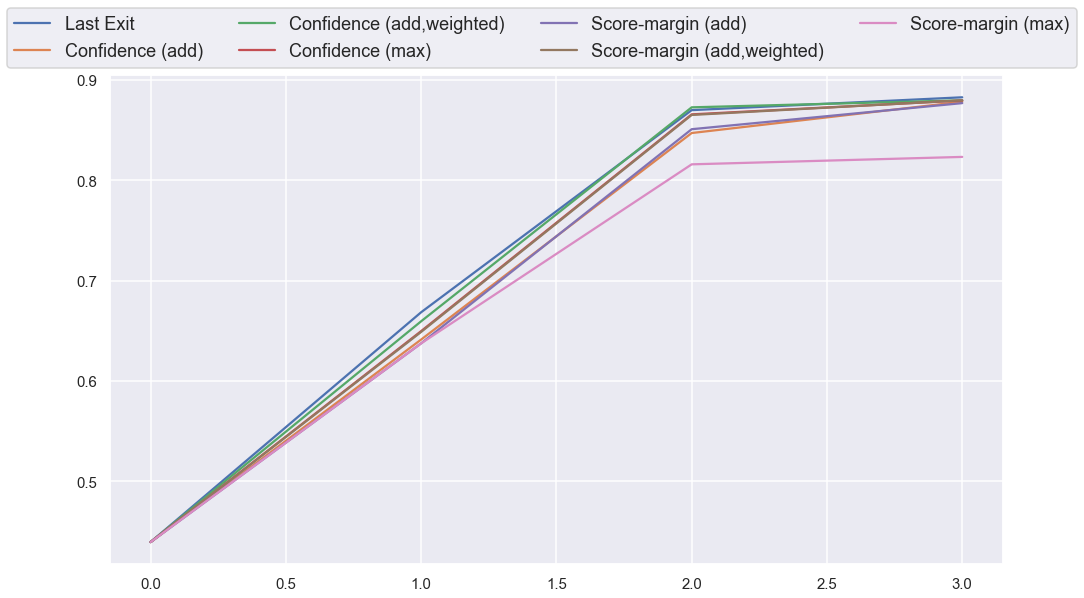

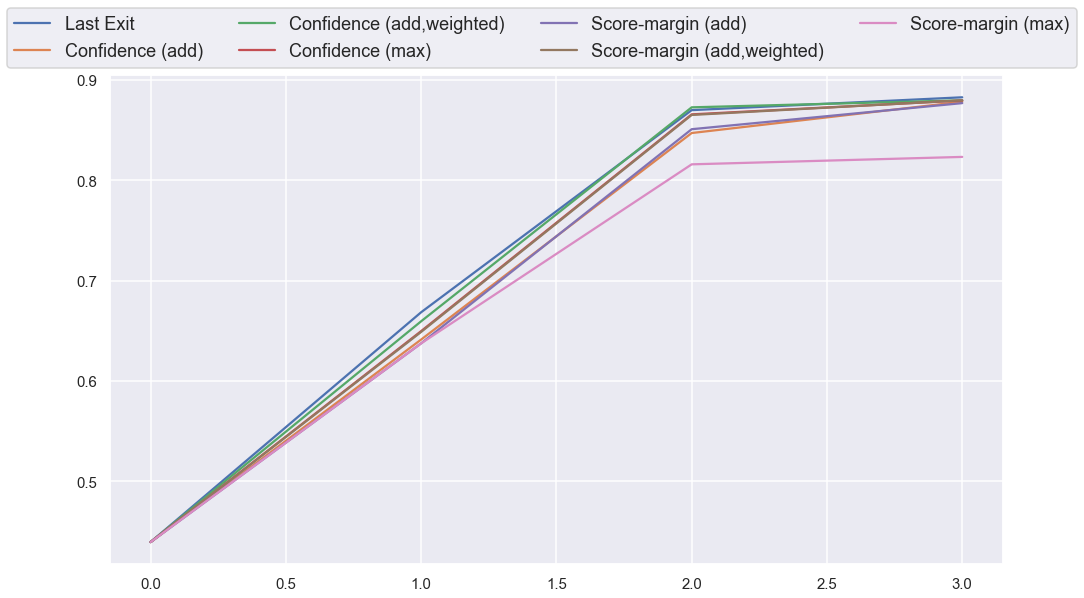

In [111]:
for net in lp:
    fig, axes = plt.subplots(1,1)
    for method in methods:
        axes.plot(lp['b-resnet'][method])

    fig.legend(['Last Exit', 'Confidence (add)', 'Confidence (add,weighted)', 'Confidence (max)',
           'Score-margin (add)', 'Score-margin (add,weighted)', 'Score-margin (max)'], ncol=4, 
           loc="upper center", fontsize='medium')

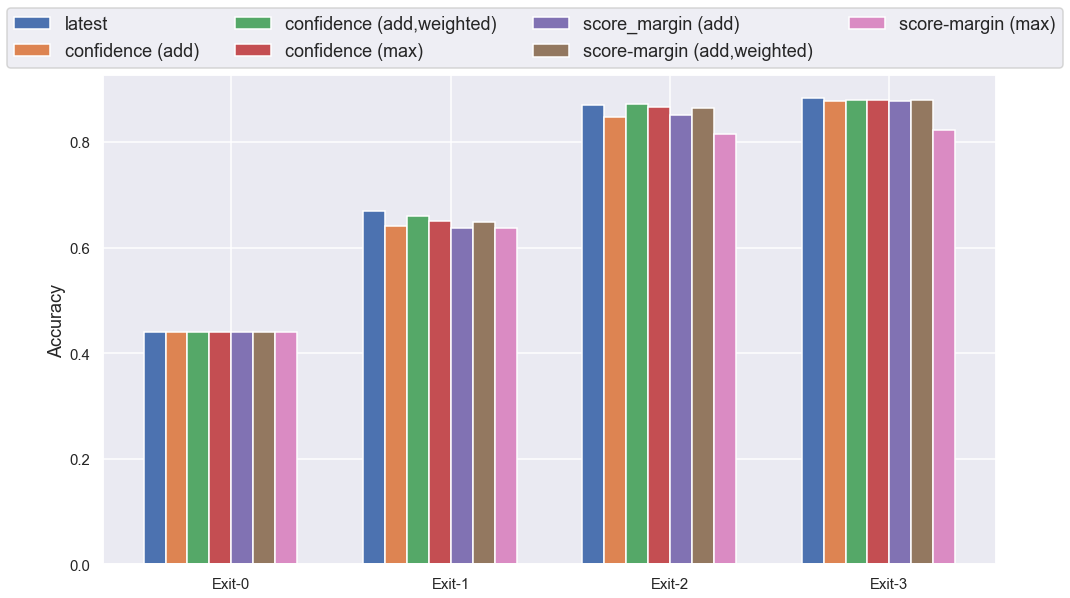

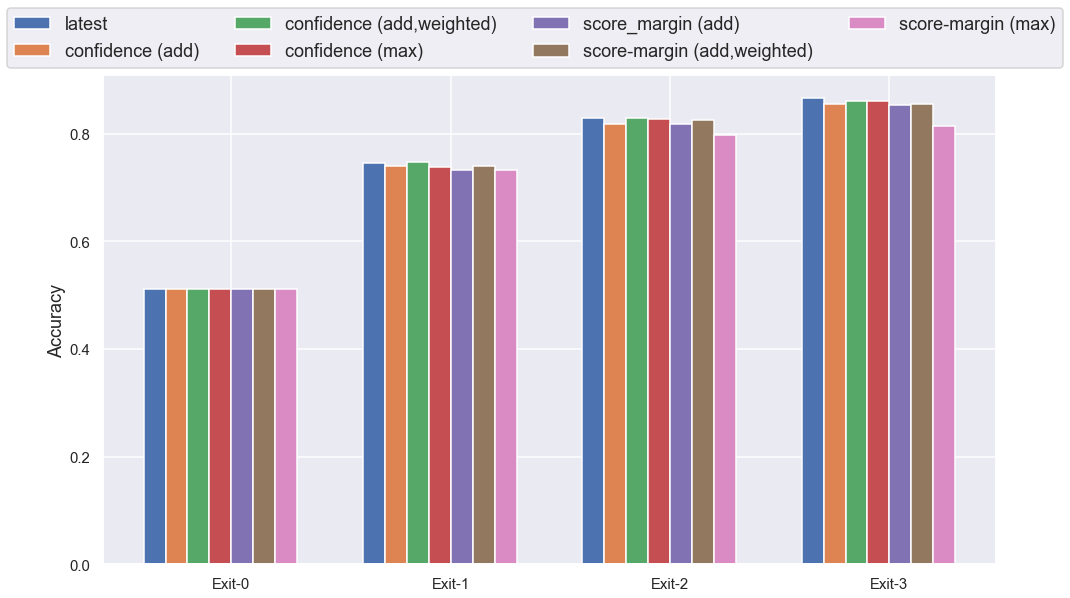

In [114]:
for net in lp:
    fig, axes = plt.subplots(1,1)
    x = np.arange(4)
    width = 0.10  
    for index_offset, method in zip(np.arange(-3,4,1), methods):
        axes.bar(x+width*index_offset, lp[net][method], width=width)

    axes.set_xticks(x + width / 2)
    fig.legend(methods, ncol=4, 
               loc="upper center", fontsize='medium')

    axes.set_xticklabels('Exit-{}'.format(i) for i in x)
    axes.set(ylabel='Accuracy')
    
    plt.savefig(net + '_theoretical_score_combinations.png')